In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits

In [ ]:
digits=load_digits()

In [5]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [4]:
digits.data[0]   ## it is a one dimensional object represented as an array

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

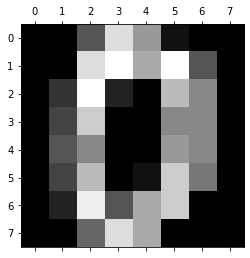

In [11]:
plt.gray()
plt.matshow(digits.images[0])       # Display an array as a matrix in a new figure window.

<Figure size 432x288 with 0 Axes>

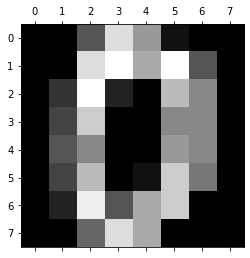

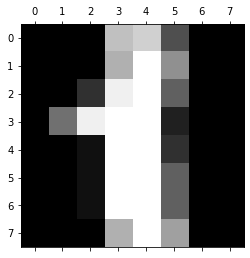

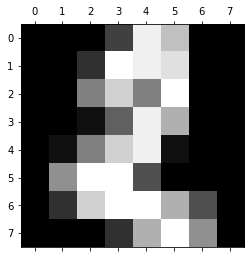

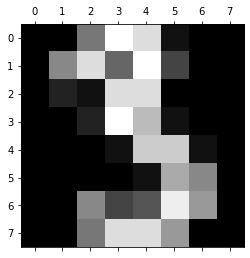

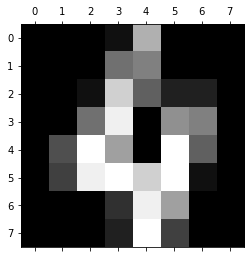

In [13]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [41]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [14]:
from sklearn.model_selection import train_test_split   # training the model

In [21]:
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.2) # dividing test as 20% and train as 80

In [22]:
len(X_train)

1437

In [23]:
len(X_test)

360

In [26]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()         #LogisticRegressionmodel


In [43]:
model.fit(X_train,y_train)
   # fitting the model

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
model.score(X_test,y_test)  #score tells how accurate is our model

0.9611111111111111

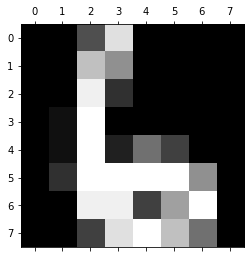

In [31]:
plt.matshow(digits.images[67])  #picking up a randomsample


In [32]:
digits.target[67]

6

In [33]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [34]:
model.predict([digits.data[67]])

array([6])

In [45]:
y_predicted=model.predict(X_test)
from sklearn.metrics import confusion_matrix

# since our model is 0.96 accurate we want to know where we went wrong for that we can use confusion matrix

In [38]:
cm=confusion_matrix(y_test,y_predicted)     # test-truth value,predicted-what model obtained
cm 

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  1,  0,  0,  1],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 42,  0,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 26,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 22,  0,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  1,  0,  2,  0,  0,  1, 39]], dtype=int64)

Text(69.0, 0.5, 'Truth')

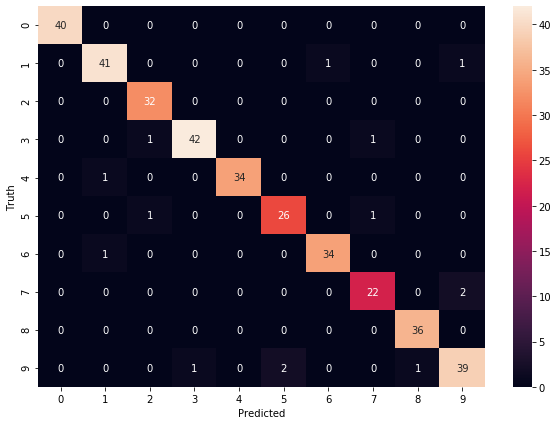

In [46]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')       #since the above matrix is not clear we visualize that

from above visualization we can predict that if our first test value=0 then 40 times the model predicted the value 0